### Dealing with Database

In [1]:
# creation of a database
import sqlite3      # importing the required module

In [3]:
# use the database if it is pre-existing or create a new one
connection = sqlite3.connect("myemp.db")
print ("Database has been used or created successfully...")
print ("Successfully connected with the database...")

Database has been used or created successfully...
Successfully connected with the database...


In [4]:
# SQLite Manager Online URL: https://extendsclass.com/sqlite-browser.html
# create employee table as employee(emp_id, emp_name, emp_city, emp_salary)
sqlStr = '''
         CREATE TABLE employee (
             emp_id INTEGER PRIMARY KEY,
             emp_name TEXT,
             emp_city TEXT,
             emp_salary REAL);
         '''
try:
    connection.execute(sqlStr)
    print ("The employee table has been created successfully...")
except:
    print ("Error !!! Table could not be created...")

The employee table has been created successfully...


In [10]:
# to check the table structure at the SQLite manager site use the statement: pragma table_info("employee")
print (list(connection.execute('pragma table_info("employee")')))

for each_row in list(connection.execute('pragma table_info("employee")')):
    print (each_row)

[(0, 'emp_id', 'INTEGER', 0, None, 1), (1, 'emp_name', 'TEXT', 0, None, 0), (2, 'emp_city', 'TEXT', 0, None, 0), (3, 'emp_salary', 'REAL', 0, None, 0)]
(0, 'emp_id', 'INTEGER', 0, None, 1)
(1, 'emp_name', 'TEXT', 0, None, 0)
(2, 'emp_city', 'TEXT', 0, None, 0)
(3, 'emp_salary', 'REAL', 0, None, 0)


In [29]:
# reading records from the csv file and writing (inserting) it to the employee table
import csv   # importing required module
sqlStr = "INSERT INTO employee ('{ph_emp_id}', '{ph_emp_name}', '{ph_emp_city}', '{ph_emp_salary}');"
# read lines from the csv file and store them into the table
with open('emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)
    # print (csv_reader)
    print (list(csv_reader))
    # print (len(list(csv_reader)))
    # print (tuple(csv_reader))
# csv_reader = csv.reader(data_file)  
print ("End of the csv file content...")

[['1001', 'Dhiman', 'Kolkata', '39000'], ['1002', 'Anupam', 'Kolkata', '25000'], ['1003', 'Subham', 'Mumbai', '36000'], ['1004', 'Dinesh', 'Chennai', '28000'], ['1005', 'Kakali', 'Mumbai', '25000'], ['1006', 'Bimal', 'Hyderabad', '30000'], ['1007', 'Tarun', 'Chennai', '17000'], ['1008', 'Rittik', 'Durgapur', '45000'], ['1009', 'Barun', 'Hyderabad', '39000'], ['1010', 'Utpal', 'Lucknow', '20000']]
End of the csv file content...


In [28]:
# reading records from the csv file and writing (inserting) it to the employee table
import csv   # importing required module
sqlStr = "INSERT INTO employee VALUES ('{ph_emp_id}', '{ph_emp_name}', '{ph_emp_city}', '{ph_emp_salary}');"
# read lines from the csv file and store them into the table
with open('emp_data.csv') as data_file:
    csv_reader = csv.reader(data_file)
    # reader is to read from the data file with ',' as the delimiter
    for row in csv_reader:
        print (row)
        connection.execute(sqlStr.format(ph_emp_id=row[0], ph_emp_name=row[1], ph_emp_city=row[2], ph_emp_salary=row[3]))
connection.commit()    # to make the change permanent
print ("All data from the data file have been insereted to the database table successfully...")

['1001', 'Dhiman', 'Kolkata', '39000']
['1002', 'Anupam', 'Kolkata', '25000']
['1003', 'Subham', 'Mumbai', '36000']
['1004', 'Dinesh', 'Chennai', '28000']
['1005', 'Kakali', 'Mumbai', '25000']
['1006', 'Bimal', 'Hyderabad', '30000']
['1007', 'Tarun', 'Chennai', '17000']
['1008', 'Rittik', 'Durgapur', '45000']
['1009', 'Barun', 'Hyderabad', '39000']
['1010', 'Utpal', 'Lucknow', '20000']
All data from the data file have been insereted to the database table successfully...


In [33]:
# retrieving records from the database table
# SQL for fetching all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from the databsse table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (len(list(cur_table)))
for each_row in cur_table:
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1001, Emp-Name: Dhiman, Emp-City: Kolkata, Emp-Salary: 39000.0...
Emp-ID: 1002, Emp-Name: Anupam, Emp-City: Kolkata, Emp-Salary: 25000.0...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 28000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 17000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


#### Class Assignments:

In [54]:
# Class Assignment Query-1:
# Fetch and display employee name, salary and 7.5% TDS against salaries of all the employees.
sqlStr = "SELECT emp_name, emp_salary, emp_salary * 0.075 FROM employee"
cur_table = connection.execute(sqlStr)
for each_row in cur_table:
    print (f"Emp-Name: {each_row[0]}, Emp-Salary: {each_row[1]}, Emp-TDS: {each_row[2]}...")

Emp-Name: Subham, Emp-Salary: 36000.0, Emp-TDS: 2700.0...
Emp-Name: Dinesh, Emp-Salary: 30000.0, Emp-TDS: 2250.0...
Emp-Name: Kakali, Emp-Salary: 25000.0, Emp-TDS: 1875.0...
Emp-Name: Bimal, Emp-Salary: 30000.0, Emp-TDS: 2250.0...
Emp-Name: Tarun, Emp-Salary: 30000.0, Emp-TDS: 2250.0...
Emp-Name: Rittik, Emp-Salary: 45000.0, Emp-TDS: 3375.0...
Emp-Name: Barun, Emp-Salary: 39000.0, Emp-TDS: 2925.0...
Emp-Name: Utpal, Emp-Salary: 20000.0, Emp-TDS: 1500.0...
Emp-Name: Tapas, Emp-Salary: 75000.0, Emp-TDS: 5625.0...
Emp-Name: Madhumita, Emp-Salary: 77000.0, Emp-TDS: 5775.0...


In [55]:
# Class Assignment Query-2:
# Fetch and display city wise average salaries of all the employees.
sqlStr = "SELECT emp_city, avg(emp_salary) FROM employee GROUP BY emp_city;"
cur_table = connection.execute(sqlStr)
for each_row in cur_table:
    print (f"Emp-City: {each_row[0]} and Emp-Avg-Salary: {each_row[1]}...")

Emp-City: Chennai and Emp-Avg-Salary: 30000.0...
Emp-City: Durgapur and Emp-Avg-Salary: 45000.0...
Emp-City: Gwalior and Emp-Avg-Salary: 77000.0...
Emp-City: Hyderabad and Emp-Avg-Salary: 34500.0...
Emp-City: Lucknow and Emp-Avg-Salary: 20000.0...
Emp-City: Mumbai and Emp-Avg-Salary: 30500.0...
Emp-City: Vododara and Emp-Avg-Salary: 75000.0...


#### Other operations on the database

In [34]:
# deleting records from the table
# delete those records where city = 'Kolkata'
sqlStr = "DELETE FROM employee WHERE emp_city = 'Kolkata';"
table = connection.execute(sqlStr)
print (type(table))
print ("So the number of records got deleted is", table.rowcount)
print ("So the deletion operation has been completed successfully...")

<class 'sqlite3.Cursor'>
So the number of records got deleted is 2
So the deletion operation has been completed successfully...


In [35]:
connection.commit()  # to make the change permanent

In [36]:
# retrieving all the records from the database table
# SQL for fetching all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from the databsse table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (len(list(cur_table)))
for each_row in cur_table:
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 28000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 17000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [37]:
# update operation on the existing records of the table
# update salary to 30000 where city is 'Chennai'
sqlStr = "UPDATE employee SET emp_salary = 30000 WHERE emp_city = 'Chennai';"
table = connection.execute(sqlStr)
print (type(table))
connection.commit()   # to make the change permanent
print ("So the number of records got updated is", table.rowcount)
print ("So the updation operation has been completed successfully...")

<class 'sqlite3.Cursor'>
So the number of records got updated is 2
So the updation operation has been completed successfully...


In [38]:
# retrieving all the records from the database table
# SQL for fetching all records from the database table
sqlStr = "SELECT * FROM employee;"
# read from the databsse table and point the cursor into the variable cur_table
cur_table = connection.execute(sqlStr)
# print (list(cur_table))
# print (len(list(cur_table)))
for each_row in cur_table:
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...


In [39]:
n = int(input("Please enter the number of records you want to insert now: "))
cursor = connection.cursor()
for i in range(n):
    ip_emp_id = int(input("Enter employee ID: "))
    ip_emp_name = input("Enter employee Name: ")
    ip_emp_city = input("Enter employee City: ")
    ip_emp_salary = int(input("Enter employee Salary: "))
    cursor.execute("INSERT INTO employee VALUES (?, ?, ?, ?)", (ip_emp_id, ip_emp_name, ip_emp_city, ip_emp_salary))
connection.commit()    # making the change permanent
print ("All the records got inserted successfully...")

Please enter the number of records you want to insert now:  2
Enter employee ID:  1011
Enter employee Name:  Tapas
Enter employee City:  Vododara
Enter employee Salary:  75000
Enter employee ID:  1012
Enter employee Name:  Madhumita
Enter employee City:  Gwalior
Enter employee Salary:  77000


All the records got inserted successfully...


In [42]:
# retrieving all the records from the database table
print ("Displaying the current content of the employee database table...")
cursor.execute("SELECT emp_id, emp_name, emp_city, emp_salary FROM employee;")
for each_row in cursor:
    print (f"Emp-ID: {each_row[0]}, Emp-Name: {each_row[1]}, Emp-City: {each_row[2]}, Emp-Salary: {each_row[3]}...")

Displaying the current content of the employee database table...
Emp-ID: 1003, Emp-Name: Subham, Emp-City: Mumbai, Emp-Salary: 36000.0...
Emp-ID: 1004, Emp-Name: Dinesh, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1005, Emp-Name: Kakali, Emp-City: Mumbai, Emp-Salary: 25000.0...
Emp-ID: 1006, Emp-Name: Bimal, Emp-City: Hyderabad, Emp-Salary: 30000.0...
Emp-ID: 1007, Emp-Name: Tarun, Emp-City: Chennai, Emp-Salary: 30000.0...
Emp-ID: 1008, Emp-Name: Rittik, Emp-City: Durgapur, Emp-Salary: 45000.0...
Emp-ID: 1009, Emp-Name: Barun, Emp-City: Hyderabad, Emp-Salary: 39000.0...
Emp-ID: 1010, Emp-Name: Utpal, Emp-City: Lucknow, Emp-Salary: 20000.0...
Emp-ID: 1011, Emp-Name: Tapas, Emp-City: Vododara, Emp-Salary: 75000.0...
Emp-ID: 1012, Emp-Name: Madhumita, Emp-City: Gwalior, Emp-Salary: 77000.0...


In [43]:
import pandas as pd    # importing required modules

In [44]:
# uploading data from the databse table to Pandas Data Frame
df = pd.read_sql_query("SELECT * FROM employee;", connection)
df

,emp_id,emp_name,emp_city,emp_salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0
8,1011,Tapas,Vododara,75000.0
9,1012,Madhumita,Gwalior,77000.0


In [46]:
sqlStr = "SELECT * FROM employee;"
table = connection.execute(sqlStr)
column_heads = ["EMP-ID", "EMP-Name", "EMP-City", "EMP-Salary"]
records_df = pd.DataFrame(data = list(table), columns = column_heads)
records_df

,EMP-ID,EMP-Name,EMP-City,EMP-Salary
0,1003,Subham,Mumbai,36000.0
1,1004,Dinesh,Chennai,30000.0
2,1005,Kakali,Mumbai,25000.0
3,1006,Bimal,Hyderabad,30000.0
4,1007,Tarun,Chennai,30000.0
5,1008,Rittik,Durgapur,45000.0
6,1009,Barun,Hyderabad,39000.0
7,1010,Utpal,Lucknow,20000.0
8,1011,Tapas,Vododara,75000.0
9,1012,Madhumita,Gwalior,77000.0


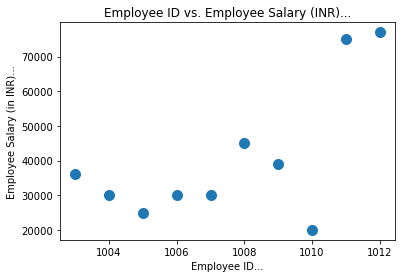

In [53]:
# basic data visualization
import matplotlib.pyplot as plt
plt.scatter(records_df["EMP-ID"], records_df["EMP-Salary"], s = 100)
plt.xlabel("Employee ID...")
plt.ylabel("Employee Salary (in INR)...")
plt.title("Employee ID vs. Employee Salary (INR)...")
plt.show()

In [ ]:
# Class Assignment:
# Total = 1 + 2 + 3 + 4 + 10 + 5 + 6 + 7 + 8 + 26 + 9 + 10 + ... n terms
# Take a value for n from the user and calculate the sum of first n terms of the given series.
# What is the 99th term of the series?